<a href="https://colab.research.google.com/github/juansokil/Deep_Learning/blob/master/AgePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL AGE PREDICTION

In [0]:
import keras
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential
from keras import metrics

Using TensorFlow backend.


In [0]:
#VGG-Face model
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
 
model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#pre-trained weights of vgg-face model. 
#you can find it here: https://drive.google.com/file/d/1CPSeum3HpopfomUEK1gybeuIVoeJT_Eo/view?usp=sharing
#related blog post: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/
model.load_weights('./models/vgg_face_weights.h5')

In [0]:

#freeze all layers of VGG-Face except last 7 one
for layer in model.layers[:-7]:
    layer.trainable = False

base_model_output = Sequential()
base_model_output = Convolution2D(101, (1, 1), name='predictions')(model.layers[-4].output)
base_model_output = Flatten()(base_model_output)
base_model_output = Activation('softmax')(base_model_output)

age_model = Model(inputs=model.input, outputs=base_model_output)



In [0]:
#pre-trained weights for gender prediction: https://drive.google.com/file/d/1wUXRVlbsni2FN9-jkS_f4UTUrm1bRLyk/view?usp=sharing
age_model.load_weights("./models/age_model_weights.h5")

In [0]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

def loadImage(filepath):
    test_img = image.load_img(filepath, target_size=(224, 224))
    test_img = image.img_to_array(test_img)
    test_img = np.expand_dims(test_img, axis = 0)
    test_img /= 255
    return test_img

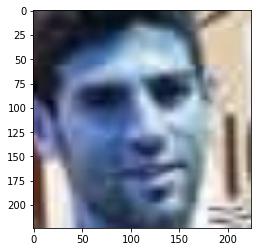

apparent age:  31


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import glob
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/*.jpg")
path


picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
img = image.load_img(picture)#, target_size=(224, 224))
plt.imshow(img)
plt.show()

prediction = age_model.predict(loadImage(picture))
prediction
output_indexes = np.array([i for i in range(0, 101)])
apparent_age = np.sum(prediction * output_indexes, axis = 1)
print("apparent age: ", int(apparent_age[0]))




In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
edad_macri = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = age_model.predict(loadImage(picture))
    prediction
    output_indexes = np.array([i for i in range(0, 101)])
    apparent_age = np.sum(prediction * output_indexes, axis = 1)
    print("apparent age: ", int(apparent_age[0]))
    edad_macri.append(apparent_age)


In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_cristinafkirchner/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
edad_cristina = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = age_model.predict(loadImage(picture))
    prediction
    output_indexes = np.array([i for i in range(0, 101)])
    apparent_age = np.sum(prediction * output_indexes, axis = 1)
    print("apparent age: ", int(apparent_age[0]))
    edad_cristina.append(apparent_age)


In [0]:
path = glob.glob("/mnt/c/Source/deep_learning/partidos_politicos/train/crop_nico_del_cano/*.jpg")
path

#picture = '/mnt/c/Source/deep_learning/partidos_politicos/train/crop_mauriciomacri/crop_(367, 83, 51, 51).jpg'
#img = image.load_img(picture)#, target_size=(224, 224))
#plt.imshow(img)
#plt.show()
edad_nico = []
for picture in path:
    #img = image.load_img(picture)#, target_size=(224, 224))
    #plt.imshow(img)
    #plt.show()
    prediction = age_model.predict(loadImage(picture))
    prediction
    output_indexes = np.array([i for i in range(0, 101)])
    apparent_age = np.sum(prediction * output_indexes, axis = 1)
    print("apparent age: ", int(apparent_age[0]))
    edad_nico.append(apparent_age)

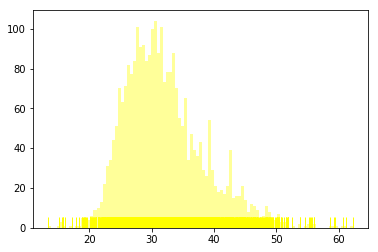

In [0]:
#!pip3 install seaborn

import seaborn as sns 
#sns.kdeplot(edad_macri, shade=True, color="green", kernel='gau')
sns.distplot(edad_macri, bins=101,kde=False, rug=True, color="yellow");


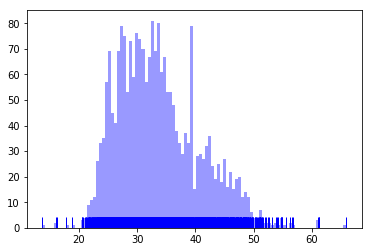

In [0]:

sns.distplot(edad_cristina, bins=101,kde=False, rug=True, color='blue');


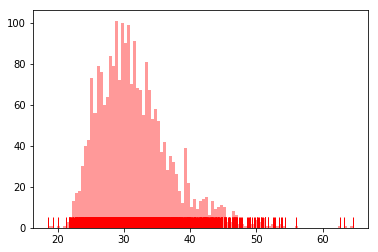

In [0]:

sns.distplot(edad_nico, bins=101,kde=False, rug=True, color='red');


In [0]:
# Python program to get average of a list 
def Average(lst): 
    return sum(lst) / len(lst) 
  
average = Average(edad_cristina) 
# Printing average of the list 
print("Average of the Cristina =", average) 

average = Average(edad_macri) 
# Printing average of the list 
print("Average of the Macri =", average) 

average = Average(edad_nico) 
# Printing average of the list 
print("Average of the Nico =", average)



Average of the Cristina = [33.68536592]
Average of the Macri = [32.06216414]
Average of the Nico = [31.69770914]


In [0]:
import numpy as np
from scipy import stats
macri= np.array(edad_macri)
stats.describe(macri)


DescribeResult(nobs=2761, minmax=(array([13.42041233]), array([62.231079])), mean=array([32.06216414]), variance=array([42.6850398]), skewness=array([0.85722771]), kurtosis=array([0.98423683]))

In [0]:
import numpy as np
from scipy import stats
cristina= np.array(edad_cristina)
stats.describe(cristina)

DescribeResult(nobs=2316, minmax=(array([13.69695799]), array([65.9233613])), mean=array([33.68536592]), variance=array([49.41944031]), skewness=array([0.64996922]), kurtosis=array([0.12873551]))

In [0]:
import numpy as np
from scipy import stats
nico= np.array(edad_nico)
stats.describe(nico)

DescribeResult(nobs=2350, minmax=(array([18.60422568]), array([64.5231238])), mean=array([31.69770914]), variance=array([32.32027797]), skewness=array([1.13754732]), kurtosis=array([2.15465108]))

In [0]:
import pandas as pd

#plt.subplot(312)
#caras_macri=caras_macri.remove(123)

sns.violinplot(edad_macri, color="yellow", alpha=0.6).set_title("Cambiemos")


Text(0.5, 1.0, 'Cambiemos')

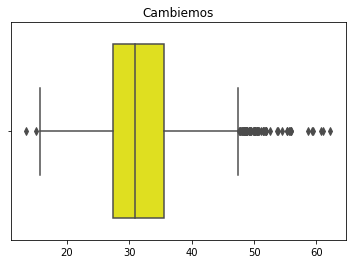

In [0]:

sns.boxplot(edad_macri, color="yellow").set_title("Cambiemos")

#sns.boxplot(edad_nico)


Text(0.5, 1.0, 'FIT')

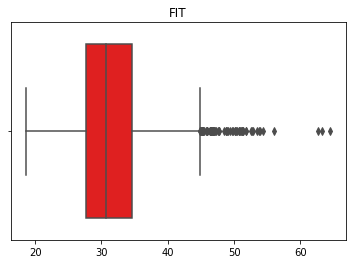

In [0]:
sns.boxplot(edad_nico, color="red").set_title("FIT")


Text(0.5, 1.0, 'Unidad Ciudadana')

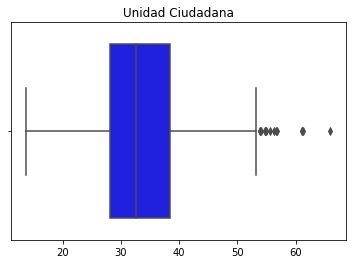

In [0]:
sns.boxplot(edad_cristina, color="blue").set_title("Unidad Ciudadana")

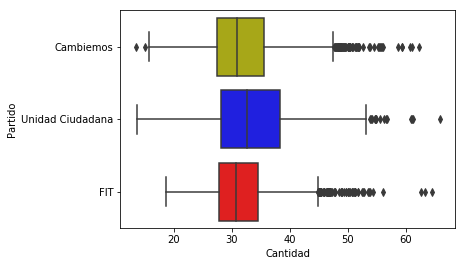

In [0]:
import pandas as pd


#Creating pandas dataframe from numpy array
#dataset1 = pd.DataFrame({'Cantidad':macri}, columns=columns)
#dataset2 = pd.DataFrame({'Partido':'Unidad Ciudadana','Cantidad':cristina}, index=index)


dataset1 = pd.DataFrame(macri)
dataset1['Partido'] = 'Cambiemos'

dataset2 = pd.DataFrame(cristina)
dataset2['Partido'] = 'Unidad Ciudadana'

dataset3 = pd.DataFrame(nico)
dataset3['Partido'] = 'FIT'

df = dataset1.append([dataset2, dataset3]).reset_index()
df

df.columns = ['index', 'Cantidad','Partido']
#df.to_csv('dataframe_caras.csv', sep=';')
sns.boxplot(df['Cantidad'], df['Partido'], palette=['y','b','r'])
#sns.violinplot(df['Cantidad'], df['Partido'], alpha=0.8, palette=['y','b','r'], cut=0,  width=1.01, bw=0.5).set_title("Distribución de Personas por imagenes")
